# REDES NEURONALES

---



## Introducción



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

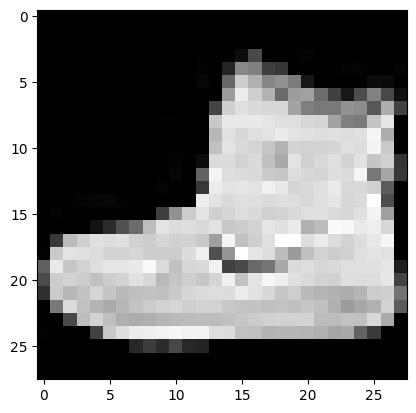

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habréis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
### Tu código aquí ###
print(f"En total hay {len(training_images)} imagenes de training y hay {len(test_images)} imagenes de test")
print(f"El tamaño de las imagenes de training es {training_images.shape} y el tamaño de las imagenes de test es {test_images.shape}")
print(f"La primera dimension que muestra el codigo .shape es la cantidad de imagenes, por lo que las dimensiones exactas de las imagenes son {training_images.shape[1]} x {training_images.shape[2]}")

En total hay 60000 imagenes de training y hay 10000 imagenes de test
El tamaño de las imagenes de training es (60000, 28, 28) y el tamaño de las imagenes de test es (10000, 28, 28)
La primera dimension que muestra el codigo .shape es la cantidad de imagenes, por lo que las dimensiones exactas de las imagenes son 28 x 28


*Tu respuesta aquí*

Hay 60,000 imagenes de training y 10,000 imagenes de test.
Las imagenes son todas de tamaño 28 x 28.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

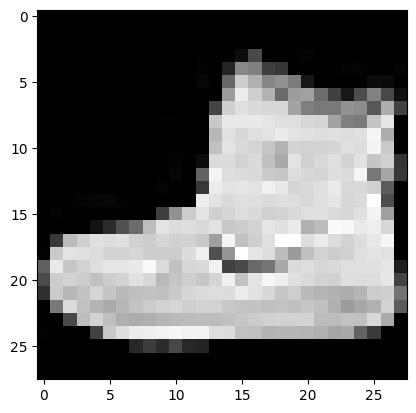



9 es la etiqueta de la imagen




In [13]:
### Tu código aquí ###
# Los datos almacenados en cada array de training y test son imagenes de dimension 28 x 28 con valores normalizados entre 0 y 1.0
print(training_images[0])
# vamos a crear una funcion que permita visualizar cualquier imagen de training o test
def show_image(array):
    plt.imshow(array, cmap="gray")
    plt.show()
show_image(training_images[0])
# se observa que es una tipo de bota
# ahora vamos a investigar que datos estan guardados en la variable y
# en este caso seran las variables almacenadas en labels
print('\n')
print(f'{training_labels[0]} es la etiqueta de la imagen')
print('\n')
# los datos almacenados en labels son las etiquetas o clasificaciones de las figuras respectivas almacenadas en los training y test sets

*Tu respuesta aquí*

Cada imagen guarda un array con un tamaño de 28 x 28.

Los valores dentro del array están normalizados para que se muestren entre 0 y 1.0. Sin embargo, originalmente, las imágenes están guardadas con cantidades entre 0 y 255 niveles de intensidad.

Investigando en la documentación de keras, se obtiene información de las etiquetas guardades en las variables label de entrenamiento y prueba:

Each training and test example is assigned to one of the following labels:

Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot



## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [14]:
### Tu código para la red neuronal de la pregunta 2 aquí ###

model = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='sigmoid'),
        Dense(10, activation= 'softmax'),
    ]
)
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, batch_size=64,)

Epoch 1/10
938/938 [==============================] - 9s 3ms/step - loss: 0.5951 - accuracy: 0.8017
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4101 - accuracy: 0.8540
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3737 - accuracy: 0.8656
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3487 - accuracy: 0.8748
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3306 - accuracy: 0.8805
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3145 - accuracy: 0.8872
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3022 - accuracy: 0.8902
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2913 - accuracy: 0.8937
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2821 - accuracy: 0.8964
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2720 - accuracy: 0.9004

Para concluir el entrenamiento de la red neuronal, una buena práctica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: Evalúa el modelo con las imágenes y etiquetas test.

In [15]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8791
Test accuracy: 0.8791000247001648



## 3: Funcionamiento de las predicción de la red neuronal



Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto? ¿Qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [18]:
### Tu código del clasificador de la pregunta 3 aquí ###

classifications = model.predict(test_images)
print(f'El primer vector de numeros de classifications es: {classifications[0]}')
print(f'El indice donde se encuentra el elemento con mayor probabilidad es: {classifications[0].argmax()}')

313/313 [==============================] - 0s 2ms/step
El primer vector de numeros de classifications es: [1.6563703e-05 1.5159414e-06 2.6414682e-05 2.5528212e-05 6.9994785e-05 6.8484135e-02 9.3442373e-05 7.7255748e-02 3.3456716e-04 8.5369200e-01]
El indice donde se encuentra el elemento con mayor probabilidad es: 9


Tu respuesta a la pregunta 3.1 aquí:

El vector de numeros representa la probabilidad que la imagen de entrada en forma de un array pertenezca a una clase específica o etiqueta. De tal forma que la suma de todos los elementos del array es 1. Finalmente,  la que se considera la clase de pertenencia será la de mayor probabilidad.

Tu respuesta a la pregunta 3.2 aquí:

El indice donde se encuentra el elemento con mayor probabilidad es: 9

Al revisar la documentación de Keras, la etiqueta de índice 9 es "Ankle boot".

## 4: Impacto variar el número de neuronas en las capas ocultas





En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y en su capa oculta cambia las 128 neuronas por:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

Entrena la red en ambos casos.

In [27]:
### Tu código para 512 neuronas aquí ###
model512 = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(512, activation='sigmoid'),
        Dense(10, activation= 'softmax'),
    ]
)
model512.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model512.fit(training_images, training_labels, epochs=10, batch_size=64, verbose=2)

Epoch 1/10
938/938 - 3s - loss: 0.5289 - accuracy: 0.8145 - 3s/epoch - 3ms/step
Epoch 2/10
938/938 - 2s - loss: 0.3992 - accuracy: 0.8564 - 2s/epoch - 2ms/step
Epoch 3/10
938/938 - 2s - loss: 0.3632 - accuracy: 0.8686 - 2s/epoch - 3ms/step
Epoch 4/10
938/938 - 2s - loss: 0.3370 - accuracy: 0.8771 - 2s/epoch - 2ms/step
Epoch 5/10
938/938 - 2s - loss: 0.3163 - accuracy: 0.8845 - 2s/epoch - 2ms/step
Epoch 6/10
938/938 - 2s - loss: 0.2970 - accuracy: 0.8915 - 2s/epoch - 2ms/step
Epoch 7/10
938/938 - 2s - loss: 0.2842 - accuracy: 0.8951 - 2s/epoch - 2ms/step
Epoch 8/10
938/938 - 3s - loss: 0.2695 - accuracy: 0.9001 - 3s/epoch - 3ms/step
Epoch 9/10
938/938 - 2s - loss: 0.2556 - accuracy: 0.9053 - 2s/epoch - 2ms/step
Epoch 10/10
938/938 - 2s - loss: 0.2472 - accuracy: 0.9084 - 2s/epoch - 2ms/step


In [26]:
### Tu código para 1024 neuronas aquí ###
model1024 = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(1024, activation='sigmoid'),
        Dense(10, activation= 'softmax'),
    ]
)
model1024.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1024.fit(training_images, training_labels, epochs=10, batch_size=64,verbose=2)

Epoch 1/10
938/938 - 3s - loss: 0.5225 - accuracy: 0.8142 - 3s/epoch - 3ms/step
Epoch 2/10
938/938 - 2s - loss: 0.4026 - accuracy: 0.8544 - 2s/epoch - 2ms/step
Epoch 3/10
938/938 - 3s - loss: 0.3638 - accuracy: 0.8677 - 3s/epoch - 3ms/step
Epoch 4/10
938/938 - 2s - loss: 0.3358 - accuracy: 0.8774 - 2s/epoch - 2ms/step
Epoch 5/10
938/938 - 2s - loss: 0.3128 - accuracy: 0.8853 - 2s/epoch - 2ms/step
Epoch 6/10
938/938 - 2s - loss: 0.2966 - accuracy: 0.8890 - 2s/epoch - 2ms/step
Epoch 7/10
938/938 - 2s - loss: 0.2794 - accuracy: 0.8961 - 2s/epoch - 2ms/step
Epoch 8/10
938/938 - 2s - loss: 0.2633 - accuracy: 0.9015 - 2s/epoch - 3ms/step
Epoch 9/10
938/938 - 2s - loss: 0.2513 - accuracy: 0.9056 - 2s/epoch - 3ms/step
Epoch 10/10
938/938 - 2s - loss: 0.2386 - accuracy: 0.9108 - 2s/epoch - 2ms/step


**pregunta 4.1 (0.5 puntos)**: ¿Cuál es el impacto que tiene la red neuronal? 

In [28]:
#Tu respuesta a la pregunta 4.1 aquí:
test_loss, test_acc = model512.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)
test_loss, test_acc = model1024.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3524 - accuracy: 0.8736 - 645ms/epoch - 2ms/step
Test accuracy: 0.8736000061035156
313/313 - 1s - loss: 0.3200 - accuracy: 0.8864 - 626ms/epoch - 2ms/step
Test accuracy: 0.8863999843597412


El impacto que tiene la red neuronal es la siguiente, luego de 10 epochs:
1) En training, la perdida baja de 0.2472 en el modelo de 512 neuronas en la capa oculta a una perdida de 0.2386 en el modelo de 1024 neuronas. Por lo que vemos que la perdida disminuye ligeramente al duplicar el numero de neuronas en la capa oculta.

2) El accuracy en el training pasa de 0.9079 en el modelo de 512 neuronas a 0.9108 en el modelo de 1024. Por lo que el accuracy se ha incrementado ligeramente.

3) Al analizar la evaluación del modelo con los datos de prueba, se encuentra también la misma tendencia a disminuir la perdida (loss) y aumentar el accuracy ligeramente.

Por lo que se puede concluir que el duplicar el numero de capas, hace disminuir la perdida y aumentar el accuracy aunque no de forma significativa.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En qué clase está clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Por qué crees que ha ocurrido esto?

In [29]:
### Tu código del clasificador de la pregunta 4 aquí ###
classifications512 = model512.predict(test_images)
print(f'El primer vector de numeros de classifications es: {classifications512[0]}')
print(f'El indice donde se encuentra el elemento con mayor probabilidad es: {classifications512[0].argmax()}')

classifications1024 = model1024.predict(test_images)
print(f'El primer vector de numeros de classifications es: {classifications1024[0]}')
print(f'El indice donde se encuentra el elemento con mayor probabilidad es: {classifications1024[0].argmax()}')

313/313 [==============================] - 0s 1ms/step
El primer vector de numeros de classifications es: [6.5875878e-07 4.3389212e-09 8.0783201e-07 8.5552540e-07 7.0206283e-07 3.8507311e-03 3.8100177e-06 3.7908957e-03 3.0242595e-06 9.9234843e-01]
El indice donde se encuentra el elemento con mayor probabilidad es: 9
313/313 [==============================] - 1s 2ms/step
El primer vector de numeros de classifications es: [1.1043481e-07 2.2764543e-07 4.2609497e-07 2.4107370e-08 1.1695791e-06 6.5478538e-03 6.0897055e-06 1.6503263e-02 1.1313055e-06 9.7693968e-01]
El indice donde se encuentra el elemento con mayor probabilidad es: 9


Tu respuesta a la pregunta 4.2 aquí:

La prenda sigue clasificada como un "Ankle boot", es decir, la etiqueta 9.

Tu respuesta a la pregunta 4.3 aquí:

Si analizamos las probabilidades de cada label o etiqueta, veremos que entre más neuronas existen en la capa oculta, la probabilidad de pertenecer a la clase 9 sigue aumentando, de 0.85 en el modelo original de 128 neuronas, pasa a 0.99 en el modelo de 512 neuronas y a 0.97 en el modelo de 1024. Por lo que podemos concluir que los modelos de más neuronas en la capa oculta, mejoran la probabilidad de pertenencia a una clase específica, es decir, clasifican mejor.

## 5: Capa Flatten




En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿Puedes explicar a qué se debe el error que da?

In [30]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
model = Sequential(
    [
        Dense(128, activation='sigmoid'),
        Dense(10, activation= 'softmax'),
    ]
)
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10


ValueError: ignored

Tu respuesta a la pregunta 5 aquí:

El error ocurre debido a que la capa Flatten, era la encargada de transformar el array de una imagen de 28 x 28 a un arreglo unidimensional.

La capa Flatten es necesaria para que las dimensiones de entrada y salida del modelo coincidan.  El modelo espera que la forma (shape) de las etiquetas (labels) sea la misma que la salida (output) del modelo, pero en este caso no es así.

## 6: Número de neuronas de la capa de salida


Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [33]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
model5 = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='sigmoid'),
        Dense(5, activation= 'softmax'),
    ]
)
model5.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5.fit(training_images, training_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 5s - loss: nan - accuracy: 0.1000 - 5s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 4s - loss: nan - accuracy: 0.1000 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: nan - accuracy: 0.1000 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: nan - accuracy: 0.1000 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: nan - accuracy: 0.1000 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: nan - accuracy: 0.1000 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: nan - accuracy: 0.1000 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: nan - accuracy: 0.1000 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 4s - loss: nan - accuracy: 0.1000 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 4s - loss: nan - accuracy: 0.1000 - 4s/epoch - 2ms/step


Tu respuestas a la pregunta 6.1 aquí:

Las 10 neuronas de la última capa son debido a los diez tipos posibles de clase a la que puede pertenecer una imagen de las del dataset.

Tu respuestas a la pregunta 6.2 aquí:

Se observa que un número distinto de 10 afecta severamente en el accuracy y en el loss de entrenamiento. En el caso de 5 neuronas en la capa de salida, el accuracy se va a 0.10 y la perdida se va a infinito (nan- not a number). Por lo que un numero distinto de neuronas del de las que corresponden al numero de clases hará que los modelos sean incapaces de clasificar adecuadamente, produciendo severamente inconsistencias en la clasificación.

## 7: Aumento de epoch y su efecto en la red neuronal


En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.20 puntos)**
* ¿Por qué piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [38]:
### Tu código para 15 epoch aquí ###
model15 = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='sigmoid'),
        Dense(10, activation= 'softmax'),
    ]
)
model15.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history15 = model15.fit(training_images, training_labels, epochs=15, verbose=2, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 - 8s - loss: 0.5453 - accuracy: 0.8138 - val_loss: 0.4596 - val_accuracy: 0.8305 - 8s/epoch - 4ms/step
Epoch 2/15
1875/1875 - 4s - loss: 0.3913 - accuracy: 0.8584 - val_loss: 0.4108 - val_accuracy: 0.8544 - 4s/epoch - 2ms/step
Epoch 3/15
1875/1875 - 4s - loss: 0.3551 - accuracy: 0.8711 - val_loss: 0.3932 - val_accuracy: 0.8563 - 4s/epoch - 2ms/step
Epoch 4/15
1875/1875 - 5s - loss: 0.3295 - accuracy: 0.8814 - val_loss: 0.3668 - val_accuracy: 0.8643 - 5s/epoch - 3ms/step
Epoch 5/15
1875/1875 - 4s - loss: 0.3109 - accuracy: 0.8866 - val_loss: 0.3559 - val_accuracy: 0.8710 - 4s/epoch - 2ms/step
Epoch 6/15
1875/1875 - 4s - loss: 0.2952 - accuracy: 0.8924 - val_loss: 0.3443 - val_accuracy: 0.8764 - 4s/epoch - 2ms/step
Epoch 7/15
1875/1875 - 5s - loss: 0.2821 - accuracy: 0.8958 - val_loss: 0.3442 - val_accuracy: 0.8745 - 5s/epoch - 2ms/step
Epoch 8/15
1875/1875 - 4s - loss: 0.2706 - accuracy: 0.9007 - val_loss: 0.3382 - val_accuracy: 0.8778 - 4s/epoch - 2ms/step
Epoch 9/

In [39]:
### Tu código para 30 epoch aquí ###
model30 = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='sigmoid'),
        Dense(10, activation= 'softmax'),
    ]
)
model30.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history30 = model30.fit(training_images, training_labels, epochs=30, verbose=2, validation_data=(test_images, test_labels))

Epoch 1/30
1875/1875 - 5s - loss: 0.5421 - accuracy: 0.8158 - val_loss: 0.4398 - val_accuracy: 0.8426 - 5s/epoch - 3ms/step
Epoch 2/30
1875/1875 - 5s - loss: 0.3905 - accuracy: 0.8594 - val_loss: 0.3957 - val_accuracy: 0.8606 - 5s/epoch - 3ms/step
Epoch 3/30
1875/1875 - 4s - loss: 0.3534 - accuracy: 0.8730 - val_loss: 0.3768 - val_accuracy: 0.8672 - 4s/epoch - 2ms/step
Epoch 4/30
1875/1875 - 4s - loss: 0.3311 - accuracy: 0.8788 - val_loss: 0.3576 - val_accuracy: 0.8703 - 4s/epoch - 2ms/step
Epoch 5/30
1875/1875 - 5s - loss: 0.3110 - accuracy: 0.8862 - val_loss: 0.3573 - val_accuracy: 0.8685 - 5s/epoch - 3ms/step
Epoch 6/30
1875/1875 - 4s - loss: 0.2960 - accuracy: 0.8917 - val_loss: 0.3418 - val_accuracy: 0.8766 - 4s/epoch - 2ms/step
Epoch 7/30
1875/1875 - 5s - loss: 0.2838 - accuracy: 0.8963 - val_loss: 0.3388 - val_accuracy: 0.8780 - 5s/epoch - 3ms/step
Epoch 8/30
1875/1875 - 4s - loss: 0.2709 - accuracy: 0.8997 - val_loss: 0.3352 - val_accuracy: 0.8778 - 4s/epoch - 2ms/step
Epoch 9/

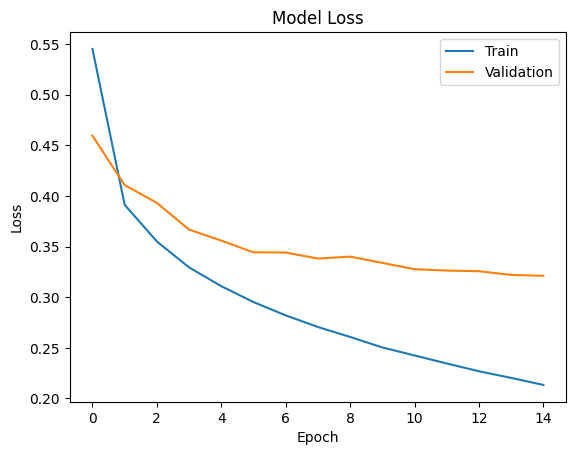

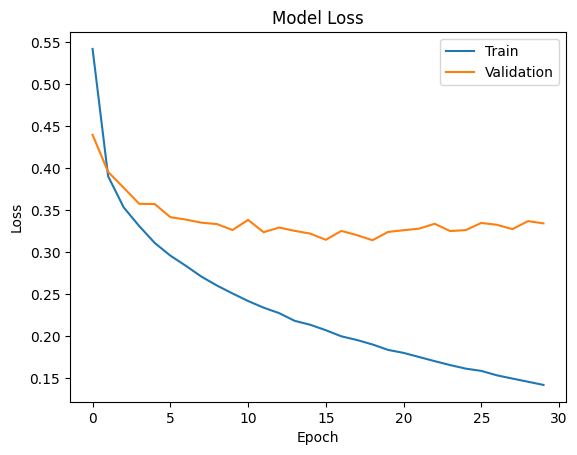

In [41]:
# graficas de loss para el modelo de 15 y 30 epochs:
plt.plot(history15.history['loss'])
plt.plot(history15.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history30.history['loss'])
plt.plot(history30.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right') 
plt.show()

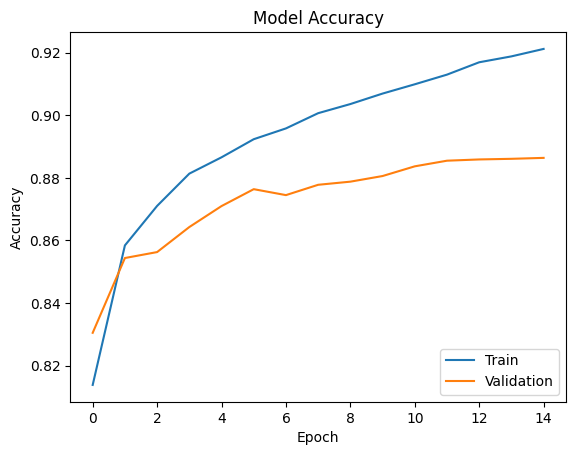

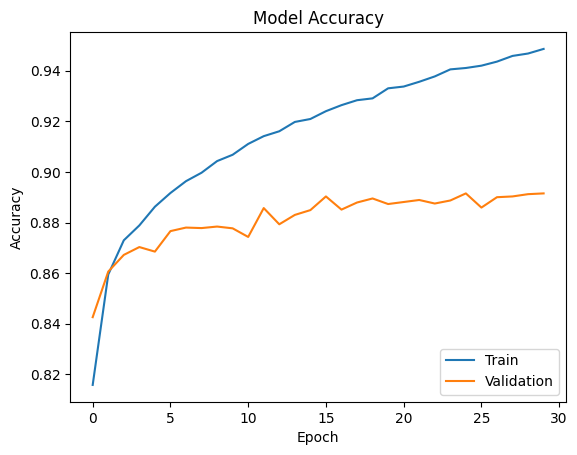

In [42]:
# graficas de accuracy para el modelo de 15 y 30 epochs
plt.plot(history15.history['accuracy'])
plt.plot(history15.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history30.history['accuracy'])
plt.plot(history30.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Tu respuesta a la pregunta 7.3 aquí:

Se observa que en el modelo de 15 epochs, la perdida continua disminuyendo aunque sea de una forma muy lenta. En cambio en el modelo de 30 epochs, la perdida se mantiene de forma mas inestable, con picos de subida y bajada, pudiera ser el principio de un modelo con overfitting.

Para comprobarlo, hacemos la gráfica de accuracy de ambos modelos, en el modelo de 15 se observa que el accuracy de los datos de prueba tiende ligeramente a mejorar, sin embargo, en el modelo de 30 epochs, la tendencia es más a mantenerse estable, con cambios bruscos de accuracy aunque no tan fuertes.

Esto nos permite concluir que el modelo de 30 epochs comienza a mostrar overfitting, es decir, sobreentrenamiento.

## 8: Early stop


En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [43]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [44]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss')<0.4):
            print("\nLoss es menor a 0.4. Cancelando Training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.12.0
Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4781 - accuracy: 0.8293
Epoch 2/50
1857/1875 [============================>.] - ETA: 0s - loss: 0.3589 - accuracy: 0.8683
Loss es menor a 0.4. Cancelando Training!
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3586 - accuracy: 0.8685


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [45]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
model_a = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='sigmoid'),
        Dense(256, activation='sigmoid'),
        Dense(512, activation='sigmoid'),
        Dense(10, activation= 'softmax'),
    ]
)
model_a.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_a = model_a.fit(training_images, training_labels, epochs=10, verbose=2, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 - 7s - loss: 0.6174 - accuracy: 0.7697 - val_loss: 0.4712 - val_accuracy: 0.8306 - 7s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 6s - loss: 0.4015 - accuracy: 0.8529 - val_loss: 0.4527 - val_accuracy: 0.8384 - 6s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.3611 - accuracy: 0.8682 - val_loss: 0.3952 - val_accuracy: 0.8564 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.3353 - accuracy: 0.8777 - val_loss: 0.3719 - val_accuracy: 0.8631 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 6s - loss: 0.3167 - accuracy: 0.8842 - val_loss: 0.3763 - val_accuracy: 0.8619 - 6s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.3024 - accuracy: 0.8886 - val_loss: 0.3595 - val_accuracy: 0.8721 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.2882 - accuracy: 0.8937 - val_loss: 0.3455 - val_accuracy: 0.8753 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.2767 - accuracy: 0.8965 - val_loss: 0.3588 - val_accuracy: 0.8698 - 5s/epoch - 3ms/step
Epoch 9/

In [46]:
model_b = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(512, activation='relu'),
        Dense(10, activation= 'softmax'),
    ]
)
model_b.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_b = model_b.fit(training_images, training_labels, epochs=10, verbose=2, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 - 7s - loss: 0.4784 - accuracy: 0.8239 - val_loss: 0.4149 - val_accuracy: 0.8509 - 7s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.3636 - accuracy: 0.8671 - val_loss: 0.4673 - val_accuracy: 0.8342 - 5s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.3281 - accuracy: 0.8783 - val_loss: 0.3625 - val_accuracy: 0.8672 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.3077 - accuracy: 0.8865 - val_loss: 0.3642 - val_accuracy: 0.8681 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 5s - loss: 0.2896 - accuracy: 0.8928 - val_loss: 0.3683 - val_accuracy: 0.8631 - 5s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.2756 - accuracy: 0.8963 - val_loss: 0.3302 - val_accuracy: 0.8794 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.2608 - accuracy: 0.9028 - val_loss: 0.3805 - val_accuracy: 0.8706 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.2536 - accuracy: 0.9027 - val_loss: 0.3470 - val_accuracy: 0.8755 - 5s/epoch - 3ms/step
Epoch 9/

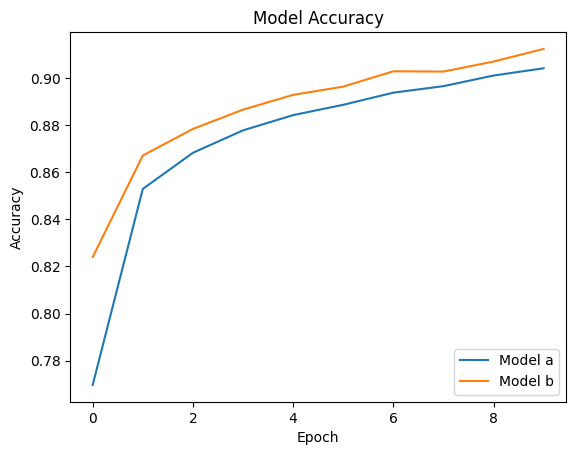

In [48]:
# grafiquemos ambos modelos en accuracy y loss para training
plt.plot(history_a.history['accuracy'])
plt.plot(history_b.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model a', 'Model b'], loc='lower right')
plt.show()

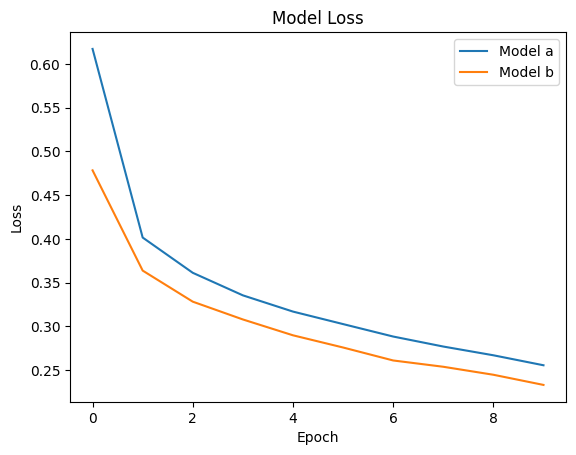

In [49]:
plt.plot(history_a.history['loss'])
plt.plot(history_b.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model a', 'Model b'], loc='upper right')
plt.show()

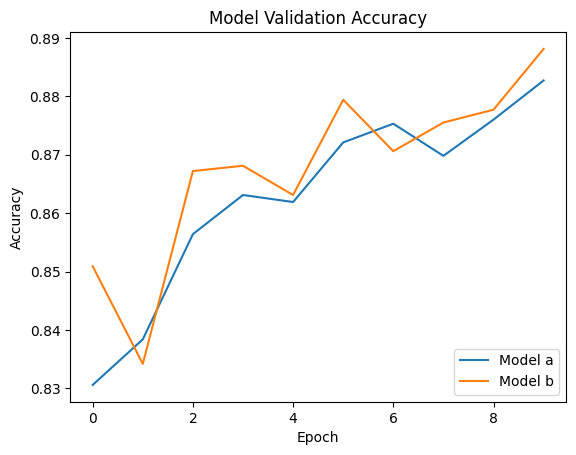

In [50]:
# ahora vamos a graficar para validacion
plt.plot(history_a.history['val_accuracy'])
plt.plot(history_b.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model a', 'Model b'], loc='lower right')
plt.show()

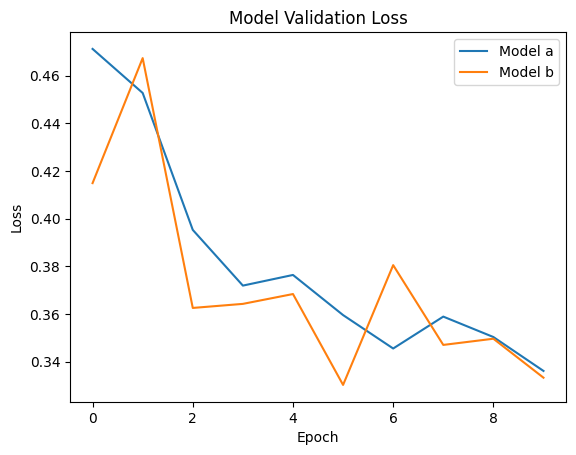

In [51]:
# perdidas en validacion
plt.plot(history_a.history['val_loss'])
plt.plot(history_b.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model a', 'Model b'], loc='upper right')
plt.show()

En esta pregunta en particular, se utilizaron los datos de prueba en la validación del modelo, para que actualizara en cada epoch los pesos adecuadamente.

Se observa en todas las gráficas la tendencia del modelo b en ser ligeramente superior, el modelo b utiliza relu y el modelo a utiliza sigmoid como funciones de activación.

El modelo b mejora en accuracy y disminuye en perdidas a lo largo de los epochs de entrenamiento. Al analizar los datos de validación se observa que el modelo b es ligeramente más robusto que el a.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [52]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# vamos a comenzar con el modelo base y luego agregaremos las inicializaciones solicitadas

model_base = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation= 'softmax'),
    ]
)
model_base.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_base = model_base.fit(training_images, training_labels, epochs=10, verbose=2)


Epoch 1/10
1875/1875 - 6s - loss: 0.4888 - accuracy: 0.8245 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.3652 - accuracy: 0.8675 - 5s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.3301 - accuracy: 0.8789 - 5s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.3080 - accuracy: 0.8857 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 7s - loss: 0.2906 - accuracy: 0.8925 - 7s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.2746 - accuracy: 0.8977 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.2614 - accuracy: 0.9018 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.2514 - accuracy: 0.9050 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 5s - loss: 0.2419 - accuracy: 0.9091 - 5s/epoch - 3ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.2325 - accuracy: 0.9128 - 4s/epoch - 2ms/step


In [53]:
from keras import initializers

In [54]:
# ahora vamos a inicializar los modelos con los valores indicados
# a) inicializacion con ceros
model_zeros = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu', kernel_initializer=initializers.Zeros()),
        Dense(256, activation='relu', kernel_initializer=initializers.Zeros()),
        Dense(64, activation='relu', kernel_initializer=initializers.Zeros()),
        Dense(10, activation= 'softmax', kernel_initializer=initializers.Zeros()),
    ]
)
model_zeros.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_zeros = model_zeros.fit(training_images, training_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 7s - loss: 2.3027 - accuracy: 0.1014 - 7s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 5s - loss: 2.3028 - accuracy: 0.0997 - 5s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 4s - loss: 2.3028 - accuracy: 0.0984 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 5s - loss: 2.3028 - accuracy: 0.0992 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 4s - loss: 2.3028 - accuracy: 0.0994 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 2.3028 - accuracy: 0.0985 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 5s - loss: 2.3027 - accuracy: 0.1014 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 4s - loss: 2.3027 - accuracy: 0.1010 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 5s - loss: 2.3028 - accuracy: 0.0988 - 5s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 5s - loss: 2.3028 - accuracy: 0.0977 - 5s/epoch - 3ms/step


In [57]:
# b) inicializacion con una variable aleatoria normal
model_random = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu', kernel_initializer=initializers.RandomNormal()),
        Dense(256, activation='relu', kernel_initializer=initializers.RandomNormal()),
        Dense(64, activation='relu', kernel_initializer=initializers.RandomNormal()),
        Dense(10, activation= 'softmax', kernel_initializer=initializers.RandomNormal()),
    ]
)
model_random.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_random = model_random.fit(training_images, training_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 0.5179 - accuracy: 0.8133 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.3698 - accuracy: 0.8630 - 5s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.3338 - accuracy: 0.8776 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.3094 - accuracy: 0.8849 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 5s - loss: 0.2945 - accuracy: 0.8891 - 5s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.2752 - accuracy: 0.8975 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.2650 - accuracy: 0.9000 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.2514 - accuracy: 0.9051 - 5s/epoch - 3ms/step
Epoch 9/10
1875/1875 - 4s - loss: 0.2443 - accuracy: 0.9068 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 5s - loss: 0.2333 - accuracy: 0.9115 - 5s/epoch - 2ms/step


In [58]:
# c) inicializacion con los valores por defecto de Keras para una capa Dense (estrategia glorot uniform)
model_glorot = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu', kernel_initializer=initializers.GlorotUniform()),
        Dense(256, activation='relu', kernel_initializer=initializers.GlorotUniform()),
        Dense(64, activation='relu', kernel_initializer=initializers.GlorotUniform()),
        Dense(10, activation= 'softmax', kernel_initializer=initializers.GlorotUniform()),
    ]
)
model_glorot.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_glorot = model_glorot.fit(training_images, training_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 0.4870 - accuracy: 0.8238 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.3658 - accuracy: 0.8657 - 5s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.3319 - accuracy: 0.8770 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.3085 - accuracy: 0.8847 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.2929 - accuracy: 0.8905 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.2770 - accuracy: 0.8953 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.2665 - accuracy: 0.8993 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.2521 - accuracy: 0.9049 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 4s - loss: 0.2423 - accuracy: 0.9081 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 5s - loss: 0.2317 - accuracy: 0.9127 - 5s/epoch - 3ms/step


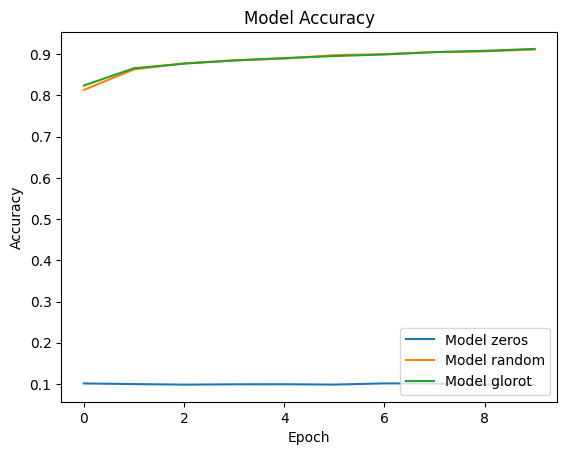

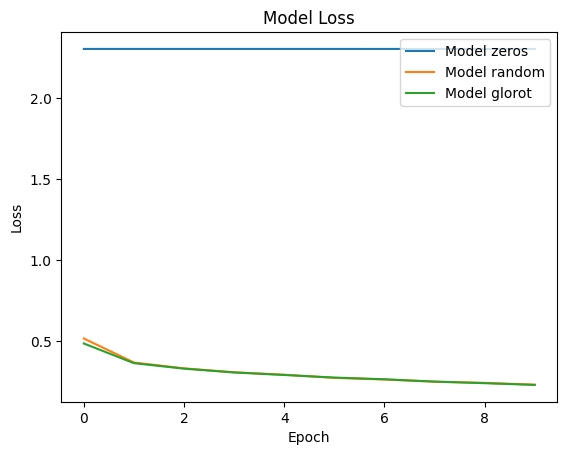

In [60]:
# Graficando accuracy y loss de los tres modelos
plt.plot(history_zeros.history['accuracy'])
plt.plot(history_random.history['accuracy'])
plt.plot(history_glorot.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model zeros', 'Model random', 'Model glorot'], loc='lower right')
plt.show()

plt.plot(history_zeros.history['loss'])
plt.plot(history_random.history['loss'])
plt.plot(history_glorot.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model zeros', 'Model random', 'Model glorot    '], loc='upper right')
plt.show()


Se observa que los modelos con las estrategias de inicializacion con variables aleatorias normales y la estrategia por defecto (glorot uniform) son mejores que el modelo de inicialización por ceros.

Vamos a analizar estos dos modelos más detenidamente:

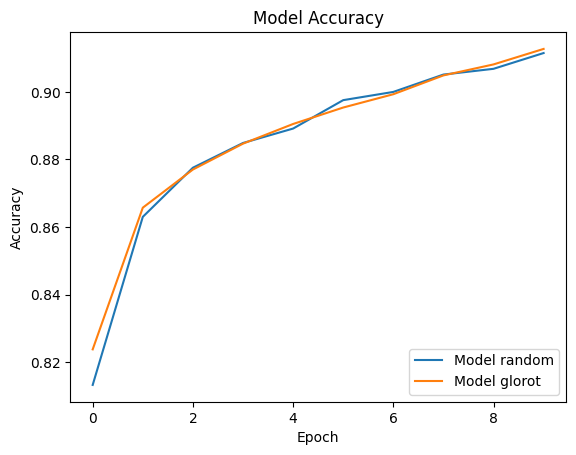

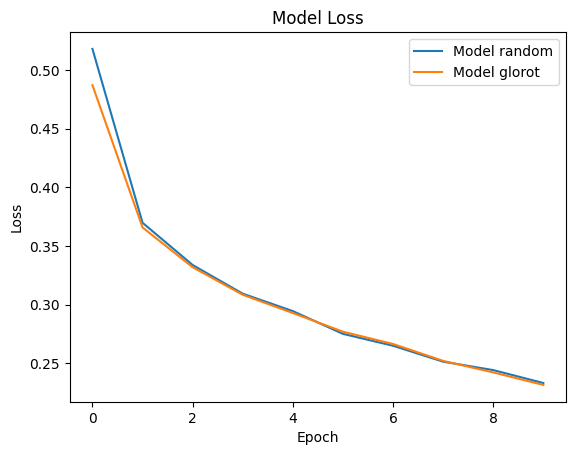

In [61]:
plt.plot(history_random.history['accuracy'])
plt.plot(history_glorot.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model random', 'Model glorot'], loc='lower right')
plt.show()

plt.plot(history_random.history['loss'])
plt.plot(history_glorot.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model random', 'Model glorot'], loc='upper right')
plt.show()

In [64]:
# evaluando ambos modelos
print(f"El modelo random tiene un accuracy en los datos de test de {model_random.evaluate(test_images, test_labels)[1]}")
print(f"El modelo glorot tiene un accuracy en los datos de test de {model_glorot.evaluate(test_images, test_labels)[1]}")
print(f"El modelo random tiene una perdida en los datos de test de {model_random.evaluate(test_images, test_labels)[0]}")
print(f"El modelo glorot tiene una perdida en los datos de test de {model_glorot.evaluate(test_images, test_labels)[0]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8709
El modelo random tiene un accuracy en los datos de test de 0.8708999752998352
313/313 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8868
El modelo glorot tiene un accuracy en los datos de test de 0.8867999911308289
313/313 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8709
El modelo random tiene una perdida en los datos de test de 0.3561192750930786
313/313 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8868
El modelo glorot tiene una perdida en los datos de test de 0.33065739274024963


El modelo glorot tiene un desempeño mejor en datos de training y test, además de mayor accuracy y perdida, por lo que seguiremos usando la estrategia de inicialización por defecto de keras.

## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [65]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# usaremos el modelo base, el cual tiene los inicializadores por defecto, por lo que no es necesario escribirlos, en este caso es el optimizador
# Adam

model_base = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation= 'softmax'),
    ]
)
model_base.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_base = model_base.fit(training_images, training_labels, epochs=10, verbose=2)


Epoch 1/10
1875/1875 - 6s - loss: 0.4874 - accuracy: 0.8239 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.3671 - accuracy: 0.8654 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.3290 - accuracy: 0.8787 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.3048 - accuracy: 0.8873 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.2891 - accuracy: 0.8921 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.2741 - accuracy: 0.8974 - 5s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.2598 - accuracy: 0.9028 - 5s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.2508 - accuracy: 0.9064 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 5s - loss: 0.2407 - accuracy: 0.9084 - 5s/epoch - 3ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.2329 - accuracy: 0.9113 - 4s/epoch - 2ms/step


In [66]:
# modelo usando de optimizador SGD
model_base = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation= 'softmax'),
    ]
)
model_base.compile(optimizer=tf.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_base = model_base.fit(training_images, training_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 5s - loss: 0.7600 - accuracy: 0.7447 - 5s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.4866 - accuracy: 0.8296 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.4378 - accuracy: 0.8457 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.4071 - accuracy: 0.8567 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.3855 - accuracy: 0.8633 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.3681 - accuracy: 0.8696 - 5s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.3538 - accuracy: 0.8724 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.3415 - accuracy: 0.8768 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 5s - loss: 0.3308 - accuracy: 0.8802 - 5s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.3212 - accuracy: 0.8825 - 4s/epoch - 2ms/step


In [67]:
# modelo con RMSprop
model_base = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation= 'softmax'),
    ]
)
model_base.compile(optimizer=tf.optimizers.RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_base = model_base.fit(training_images, training_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 0.5015 - accuracy: 0.8173 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.3862 - accuracy: 0.8602 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.3677 - accuracy: 0.8723 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.3574 - accuracy: 0.8760 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.3569 - accuracy: 0.8770 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.3528 - accuracy: 0.8799 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.3515 - accuracy: 0.8805 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.3457 - accuracy: 0.8824 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 5s - loss: 0.3479 - accuracy: 0.8826 - 5s/epoch - 3ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.3433 - accuracy: 0.8838 - 4s/epoch - 2ms/step


In [68]:
# modelo con Adagrad
model_base = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation= 'softmax'),
    ]
)
model_base.compile(optimizer=tf.optimizers.Adagrad(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_base = model_base.fit(training_images, training_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 5s - loss: 1.1513 - accuracy: 0.6304 - 5s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.6736 - accuracy: 0.7826 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.5822 - accuracy: 0.8091 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.5384 - accuracy: 0.8199 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.5124 - accuracy: 0.8265 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.4947 - accuracy: 0.8315 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.4810 - accuracy: 0.8351 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.4705 - accuracy: 0.8376 - 5s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 4s - loss: 0.4621 - accuracy: 0.8406 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.4546 - accuracy: 0.8430 - 4s/epoch - 2ms/step


Se puede ver que la red neuronal funciona mejor con Adam() que ha sido el optimizador que hemos usado desde el principio.

## 12. Regularización y red final 

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [69]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# vamos a tomar el modelo base de punto de partida, agregando el set de validacion al modelo:



In [70]:
model_base = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation= 'softmax'),
    ]
)
model_base.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_base = model_base.fit(training_images, training_labels, epochs=10, verbose=2, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 - 7s - loss: 0.4835 - accuracy: 0.8250 - val_loss: 0.5213 - val_accuracy: 0.8136 - 7s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.3656 - accuracy: 0.8657 - val_loss: 0.3711 - val_accuracy: 0.8661 - 5s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.3289 - accuracy: 0.8778 - val_loss: 0.3935 - val_accuracy: 0.8590 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.3072 - accuracy: 0.8863 - val_loss: 0.3702 - val_accuracy: 0.8657 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 5s - loss: 0.2883 - accuracy: 0.8925 - val_loss: 0.3740 - val_accuracy: 0.8626 - 5s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.2742 - accuracy: 0.8968 - val_loss: 0.3332 - val_accuracy: 0.8817 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.2641 - accuracy: 0.9007 - val_loss: 0.3254 - val_accuracy: 0.8822 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 6s - loss: 0.2506 - accuracy: 0.9052 - val_loss: 0.3486 - val_accuracy: 0.8768 - 6s/epoch - 3ms/step
Epoch 9/

In [72]:
# ahora vamos a entrenar el modelo con hasta 30 epochs, y vamos a agregar una capa de dropout para luego analizar las graficas
# de accuracy en training y validation
from keras.layers import Dropout
model = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.2), # dropout del 20%
    Dense(256, activation='relu'),
    Dropout(0.2), # dropout del 20%
    Dense(64, activation='relu'),
    Dropout(0.2), # dropout del 20%
    Dense(10, activation= 'softmax'),
])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, verbose=2, validation_data=(test_images, test_labels))


Epoch 1/30
1875/1875 - 7s - loss: 0.5885 - accuracy: 0.7881 - val_loss: 0.4436 - val_accuracy: 0.8413 - 7s/epoch - 4ms/step
Epoch 2/30
1875/1875 - 6s - loss: 0.4388 - accuracy: 0.8416 - val_loss: 0.3948 - val_accuracy: 0.8569 - 6s/epoch - 3ms/step
Epoch 3/30
1875/1875 - 5s - loss: 0.3990 - accuracy: 0.8553 - val_loss: 0.3891 - val_accuracy: 0.8606 - 5s/epoch - 3ms/step
Epoch 4/30
1875/1875 - 6s - loss: 0.3779 - accuracy: 0.8631 - val_loss: 0.3869 - val_accuracy: 0.8637 - 6s/epoch - 3ms/step
Epoch 5/30
1875/1875 - 6s - loss: 0.3610 - accuracy: 0.8684 - val_loss: 0.3678 - val_accuracy: 0.8671 - 6s/epoch - 3ms/step
Epoch 6/30
1875/1875 - 5s - loss: 0.3510 - accuracy: 0.8718 - val_loss: 0.3581 - val_accuracy: 0.8711 - 5s/epoch - 3ms/step
Epoch 7/30
1875/1875 - 6s - loss: 0.3426 - accuracy: 0.8751 - val_loss: 0.3624 - val_accuracy: 0.8714 - 6s/epoch - 3ms/step
Epoch 8/30
1875/1875 - 5s - loss: 0.3303 - accuracy: 0.8787 - val_loss: 0.3526 - val_accuracy: 0.8737 - 5s/epoch - 3ms/step
Epoch 9/

In [87]:
# ahora vamos a probar otro modelo que funcionó en pasos anteriores, pero agregando un Dropout
model_b = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dense(10, activation= 'softmax'),
    ]
)
model_b.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_b = model_b.fit(training_images, training_labels, epochs=100, verbose=2, validation_data=(test_images, test_labels))

Epoch 1/100
1875/1875 - 7s - loss: 0.6289 - accuracy: 0.7841 - val_loss: 0.4715 - val_accuracy: 0.8294 - 7s/epoch - 3ms/step
Epoch 2/100
1875/1875 - 6s - loss: 0.4284 - accuracy: 0.8474 - val_loss: 0.4161 - val_accuracy: 0.8500 - 6s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 5s - loss: 0.3795 - accuracy: 0.8628 - val_loss: 0.4096 - val_accuracy: 0.8539 - 5s/epoch - 3ms/step
Epoch 4/100
1875/1875 - 5s - loss: 0.3531 - accuracy: 0.8711 - val_loss: 0.3797 - val_accuracy: 0.8602 - 5s/epoch - 3ms/step
Epoch 5/100
1875/1875 - 6s - loss: 0.3328 - accuracy: 0.8786 - val_loss: 0.3642 - val_accuracy: 0.8698 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 5s - loss: 0.3151 - accuracy: 0.8830 - val_loss: 0.3609 - val_accuracy: 0.8723 - 5s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.3027 - accuracy: 0.8896 - val_loss: 0.3588 - val_accuracy: 0.8673 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 5s - loss: 0.2908 - accuracy: 0.8915 - val_loss: 0.3342 - val_accuracy: 0.8821 - 5s/epoch - 3ms/step


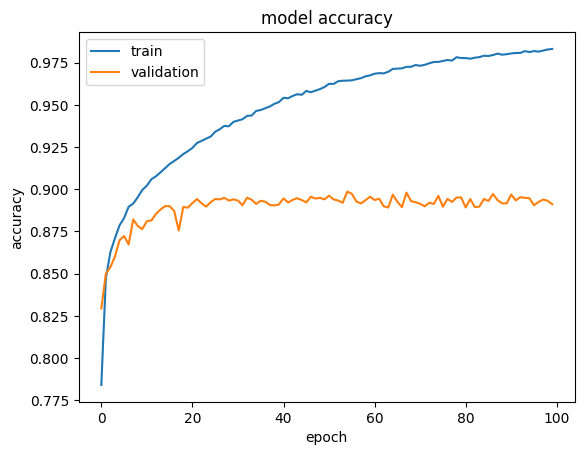

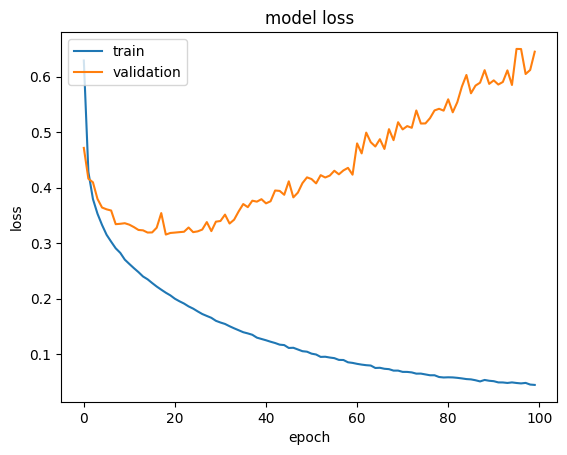

In [88]:
# vamos a graficar el accuracy y loss de training y validation
plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [97]:
# de las graficas anteriores se puede ver que alrededor de los 20 epoch, se produce un aumento de la perdida en validation, produciendo un 
# modelo con overfitting
# vamos a cambiar probar ahora con otra capa de Dropout y 25 epochs
model_b = Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(10, activation= 'softmax'),
    ]
)
model_b.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_b = model_b.fit(training_images, training_labels, epochs=25, verbose=2, validation_data=(test_images, test_labels))

Epoch 1/25
1875/1875 - 7s - loss: 0.6963 - accuracy: 0.7548 - val_loss: 0.4773 - val_accuracy: 0.8249 - 7s/epoch - 4ms/step
Epoch 2/25
1875/1875 - 5s - loss: 0.4472 - accuracy: 0.8431 - val_loss: 0.4131 - val_accuracy: 0.8504 - 5s/epoch - 3ms/step
Epoch 3/25
1875/1875 - 6s - loss: 0.3970 - accuracy: 0.8587 - val_loss: 0.3891 - val_accuracy: 0.8605 - 6s/epoch - 3ms/step
Epoch 4/25
1875/1875 - 5s - loss: 0.3692 - accuracy: 0.8668 - val_loss: 0.3697 - val_accuracy: 0.8681 - 5s/epoch - 3ms/step
Epoch 5/25
1875/1875 - 6s - loss: 0.3465 - accuracy: 0.8744 - val_loss: 0.3627 - val_accuracy: 0.8692 - 6s/epoch - 3ms/step
Epoch 6/25
1875/1875 - 5s - loss: 0.3305 - accuracy: 0.8787 - val_loss: 0.3533 - val_accuracy: 0.8716 - 5s/epoch - 3ms/step
Epoch 7/25
1875/1875 - 6s - loss: 0.3187 - accuracy: 0.8846 - val_loss: 0.3564 - val_accuracy: 0.8692 - 6s/epoch - 3ms/step
Epoch 8/25
1875/1875 - 6s - loss: 0.3053 - accuracy: 0.8887 - val_loss: 0.3469 - val_accuracy: 0.8740 - 6s/epoch - 3ms/step
Epoch 9/

El último modelo presenta un accuracy de 0.92 en training y 0.89 en validation, además se han utilizando dos capas de dropouts, una tasa de aprendizaje (learning_rate) de menor valor que el valor de por defecto para el optimizador Adam, se agregaron dos capas de Dropout del 30% (0.3) para evitar el overfitting. Finalmente, agregaremos los gráficos para asegurarnos del comportamiento del modelo en training y validation.


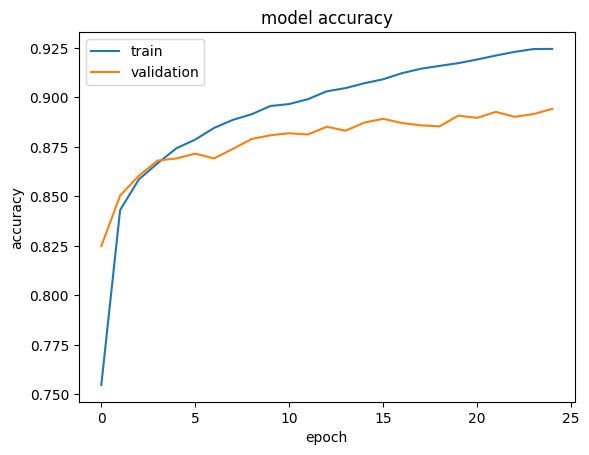

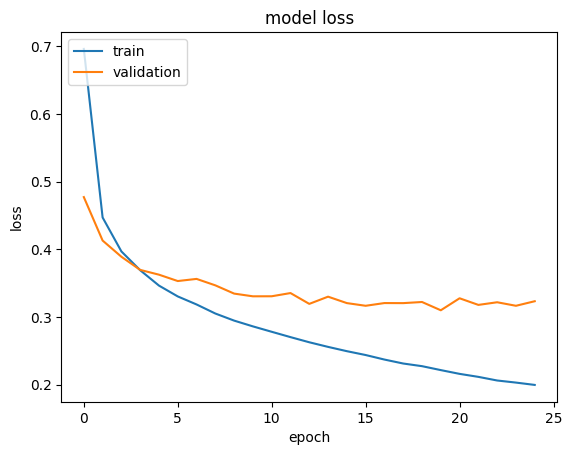

In [98]:
# vamos a graficar el accuracy y loss de training y validation
plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observamos que en 25 epochs, el modelo ha estabilizado su perdida en validación, además, el accuracy también se ha estabilizado, por lo que este trabajo concluye con haber encontrado un buen modelo para predecir las clases de F-MNIST.